RDkit Practices

In [93]:
aaSMILES = [        'N[C@@H](C)C(=O)', #0.Ala
                    'N[C@@H](CS)C(=O)', #1.Cys
                    'N[C@@H](CC(=O)O)C(=O)', #2.Asp
                    'N[C@@H](CCC(=O)O)C(=O)', #3.Glu
                    'N[C@@H](Cc1ccccc1)C(=O)', #4.Phe
                    'NCC(=O)', #5.Gly
                    'N[C@@H](Cc1c[nH]cn1)C(=O)', #6.His
                    'N[C@@H]([C@H](CC)C)C(=O)', #7.Ile
                    'N[C@@H](CCCCN)C(=O)', #8.Lys        
                    'N[C@@H](CC(C)C)C(=O)', #9.Leu
                    'N[C@@H](CCSC)C(=O)', #10.Met
                    'N[C@@H](CC(=O)N)C(=O)', #11.Asn
                    'O=C[C@@H]1CCCN1', #12.Pro
                    'N[C@@H](CCC(=O)N)C(=O)', #13.Gln
                    'N[C@@H](CCCNC(=N)N)C(=O)', #14.Arg
                    'N[C@@H](CO)C(=O)', #15.Ser
                    'N[C@@H]([C@H](O)C)C(=O)', #16.Thr
                    'N[C@@H](C(C)C)C(=O)', #17.Val
                    'N[C@@H](Cc1c[nH]c2c1cccc2)C(=O)', #18.Trp
                    'N[C@@H](Cc1ccc(O)cc1)C(=O)' #19.Tyr
              ]
print(aaSMILES[1])

N[C@@H](CS)C(=O)


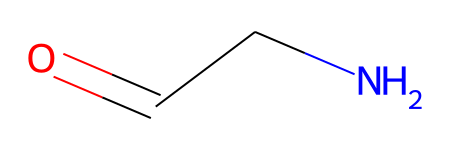

In [94]:
from rdkit import Chem
mol = Chem.MolFromSmiles(aaSMILES[5])
mol

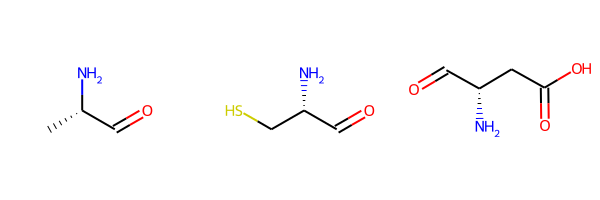

In [28]:
# Draw images 
aals = [aaSMILES[0],aaSMILES[1],aaSMILES[2]]
aals_str = []
for aa in aals:
    aa_str = Chem.MolFromSmiles(aa)
    aals_str.append(aa_str)
img = Draw.MolsToGridImage(aals_str, molsPerRow=3)
img

In [31]:
# Substructure search 
Pattern1 = Chem.MolFromSmiles('S')
Pattern2 = Chem.MolFromSmiles('C(=O)O')
for aa in aals_str:
    print(aa.HasSubstructMatch(Pattern1))

False
True
False


In [52]:
# Construct Fingerprints 
# https://www.youtube.com/watch?v=3qzZbaUzo9M
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
glycine = Chem.MolFromSmiles(aaSMILES[5])
r = 2
fp = AllChem.GetMorganFingerprint(glycine, r)
fp_BitV = AllChem.GetMorganFingerprintAsBitVect(glycine, r, nBits=1024)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp_BitV,fp_arr)
np.nonzero(fp_arr)


(array([  80,  147,  232,  430,  650,  694,  897,  981, 1004]),)

[1, 79, 80, 136, 147, 289, 310, 356, 508, 578, 618, 650, 694, 723, 726, 730, 745, 754, 786, 807, 849, 857, 972, 1004]
{1: ((1, 0),), 79: ((2, 1),), 80: ((2, 0),), 136: ((10, 2),), 147: ((0, 0),), 289: ((5, 2), (8, 2)), 310: ((4, 2), (9, 2)), 356: ((3, 0), (6, 0)), 508: ((10, 1),), 578: ((7, 1),), 618: ((2, 2),), 650: ((11, 0),), 694: ((10, 0),), 723: ((1, 2),), 726: ((4, 1), (5, 1), (8, 1), (9, 1)), 730: ((3, 1),), 745: ((6, 1),), 754: ((6, 2),), 786: ((0, 1),), 807: ((7, 0),), 849: ((4, 0), (5, 0), (8, 0), (9, 0)), 857: ((3, 2),), 972: ((1, 1),), 1004: ((11, 1),)}


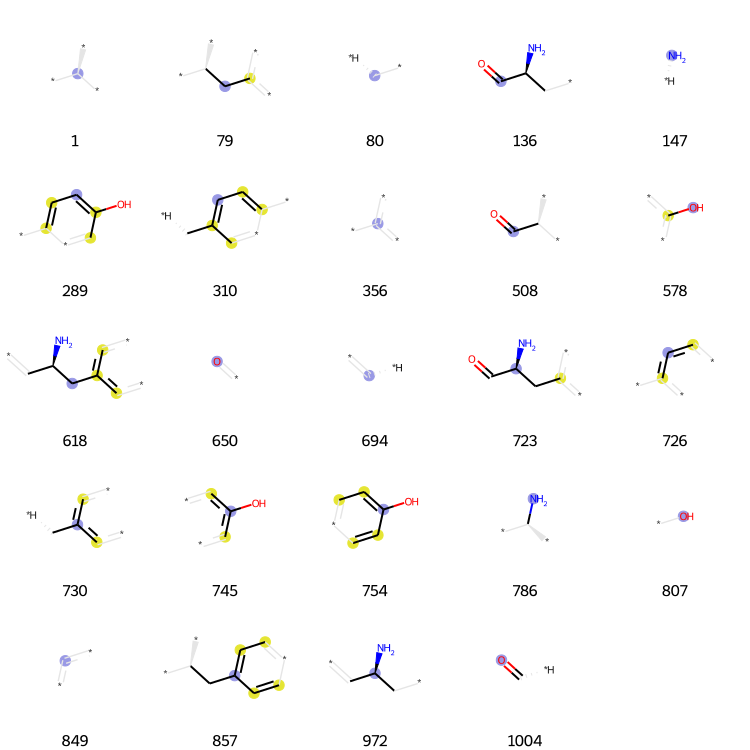

In [115]:
# show fingerprint
bi = {}
mol = Chem.MolFromSmiles(aaSMILES[19])
r = 2
fp_BitV = AllChem.GetMorganFingerprintAsBitVect(mol, r, nBits=1024, bitInfo=bi)
print(list(fp_BitV.GetOnBits()))
prints = [(mol, x, bi) for x in fp_BitV.GetOnBits()]
print(bi)
Draw.DrawMorganBits(prints, molsPerRow=5, legends=[str(x) for x in fp_BitV.GetOnBits()])

In [73]:
# Tanimoto Similarity
cys = Chem.MolFromSmiles(aaSMILES[1])
# img = Draw.MolsToGridImage([glycine, cys], molsPerRow=3)
# img
fp_BitV_gly = AllChem.GetMorganFingerprintAsBitVect(glycine, r, nBits=1024, bitInfo=bi)
fp_BitV_cys = AllChem.GetMorganFingerprintAsBitVect(cys, r, nBits=1024, bitInfo=bi)
print('gly: ',list(fp_BitV_gly.GetOnBits()))
print('cys: ',list(fp_BitV_cys.GetOnBits()))
common = set(fp_BitV_gly.GetOnBits()) & set(fp_BitV_cys.GetOnBits())
combined = set(fp_BitV_gly.GetOnBits()) | set(fp_BitV_cys.GetOnBits())
print('common: ',common)
print('combined: ',combined)
print(len(common)/len(combined))
print(DataStructs.TanimotoSimilarity(fp_BitV_gly,fp_BitV_cys))

gly:  [80, 147, 232, 430, 650, 694, 897, 981, 1004]
cys:  [1, 80, 136, 147, 229, 321, 435, 508, 650, 694, 763, 786, 789, 972, 1004]
common:  {650, 1004, 80, 147, 694}
combined:  {897, 1, 321, 136, 650, 972, 80, 786, 147, 981, 789, 229, 232, 1004, 430, 435, 694, 763, 508}
0.2631578947368421
0.2631578947368421
